In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path


In [2]:
raw_data_path = '../data/raw_data/hsls_09/hsls_17_student_pets_sr_v1_0.csv'
n_rows = 5000

# Read first 5000 rows
df_sample = pd.read_csv(raw_data_path, nrows=n_rows)

df_sample.head()

,STU_ID,SCH_ID,X1NCESID,X2NCESID,STRAT_ID,PSU,X2UNIV1,X2UNIV2A,X2UNIV2B,X3UNIV1,...,W5W1W2W3W4PSRECORDS191,W5W1W2W3W4PSRECORDS192,W5W1W2W3W4PSRECORDS193,W5W1W2W3W4PSRECORDS194,W5W1W2W3W4PSRECORDS195,W5W1W2W3W4PSRECORDS196,W5W1W2W3W4PSRECORDS197,W5W1W2W3W4PSRECORDS198,W5W1W2W3W4PSRECORDS199,W5W1W2W3W4PSRECORDS200
0,10001,-5,-5,-5,-5,-5,11,1,1,1111,...,0.0,2098.087446,1824.641398,0.0,2431.665487,0.0,0.0,2457.423209,0.0,2053.40787
1,10002,-5,-5,-5,-5,-5,11,1,1,1111,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000
2,10003,-5,-5,-5,-5,-5,11,1,1,1111,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000
3,10004,-5,-5,-5,-5,-5,10,1,7,1001,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000
4,10005,-5,-5,-5,-5,-5,11,1,1,1111,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000


In [31]:
view_cols = ['STU_ID', 
             'X1TXMTH',
             'X1TXMQUINT',      # X1 Mathematics quintile score
             'X1FAMINCOME',     # X1: family income
             'X4INCOMECAT',     # X4: income category
             'X1SES',           # X1: socioeconomic status
             'X1SESQ5',         # X1: socioeconomic status quintile
#             'X1LOCALE',        # X1: locale
#             'X1REGION',        # X1: region
             'S4HSGPA',         # S4 A07 Average grades in high school
             'X3TGPAMAT',       # X3 GPA: mathematics
             'X3TGPASCI',       # X3 GPA: science
             'X3TGPAENG',       # X3 GPA: English
             'S2REQSEL4YR',     # S2 C10D Will meet requirements for selective 4-year college by summer 2013
             'S2AFF4YSEL',      # S2 C36F Can afford highly selective 4-year private college
             'X4EVRAPPCLG',     # X4: ever applied to college
             'X4CLGAPPNUM',     # X4: college application number
             'S4EVERAPPLY',     # S4: ever applied to college
             'S3CHOICEAPPSEL',  # S3 First choice applied to college IPEDS selectivity code
             'X5PFYSLC',        # Student Records: Institutional selectivity of primary first year institution
             'S3CLGSEL',        # S3 Enrolled college IPEDS selectivity code
             'S3PROGLEVEL',     # S3 C02 Level of program enrolled in as of Nov 1 2013
             'X5HIGHDEG',       # X5: highest degree
             'X5BACCRED',       # X5: baccalaureate degree
             'X5SRRESP',        # X5: student response
             'X5PFYSEC'         # X5: postsecondary enrollment
            ]

df_sample[view_cols].head()

,STU_ID,X1TXMTH,X1TXMQUINT,X1FAMINCOME,X4INCOMECAT,X1SES,X1SESQ5,S4HSGPA,X3TGPAMAT,X3TGPASCI,...,S2REQSEL4YR,S2AFF4YSEL,X4EVRAPPCLG,X4CLGAPPNUM,S4EVERAPPLY,X5PFYSLC,X5HIGHDEG,X5BACCRED,X5SRRESP,X5PFYSEC
0,10001,0.8304,5,10,4,1.5644,5,-7,3.0,3.0,...,1,1,1,1,-7,3,0,0,1,2
1,10002,-0.2956,2,3,12,-0.3699,2,-7,4.0,4.0,...,-9,2,1,3,-7,-8,0,0,2,-8
2,10003,1.2997,5,6,7,1.2741,5,-7,2.5,2.5,...,2,2,1,10,-7,-8,0,0,2,-8
3,10004,-0.1427,3,5,8,0.5498,5,-7,3.5,3.5,...,-8,-8,-9,-9,-4,-6,-6,-6,0,-6
4,10005,1.1405,5,9,1,0.1495,4,-7,2.5,3.0,...,2,-9,1,1,-7,-6,-6,-6,0,-6


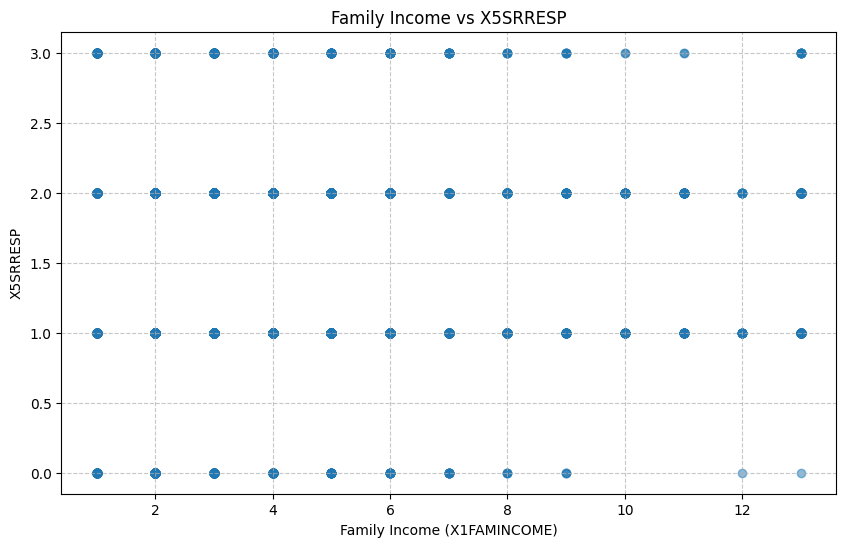

In [21]:
# Clean the data by removing negative values (missing data codes)
clean_df = df_sample[
    (df_sample['X1FAMINCOME'] >= 0) & 
    (df_sample['X5SRRESP'] >= 0)
]

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(clean_df['X1FAMINCOME'], clean_df['X5SRRESP'], alpha=0.5)
plt.xlabel('Family Income (X1FAMINCOME)')
plt.ylabel('X5SRRESP')
plt.title('Family Income vs X5SRRESP')

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

In [3]:
df_full = pd.read_csv(raw_data_path)
df_full.shape

(23503, 9614)

In [28]:
# Calculate the percentage of valid values for each column
def get_valid_percentage(series):
    if pd.api.types.is_numeric_dtype(series):
        return (series >= 0).mean()
    else:
        # For non-numeric columns, consider them valid (return 1.0)
        return 1.0

# Apply the function to each column
valid_percentages = df_full.apply(get_valid_percentage)

# Get columns where at least 50% of values are valid
columns_50pct_valid = valid_percentages[valid_percentages >= 0.5].index.tolist()

print(f"Found {len(columns_50pct_valid)} columns with >= 50% valid values")
print("\nFirst 10 columns:")
print(columns_50pct_valid[:10])

Found 7751 columns with >= 50% valid values

First 10 columns:
['STU_ID', 'X2UNIV1', 'X2UNIV2A', 'X2UNIV2B', 'X3UNIV1', 'X4UNIV1', 'W1STUDENT', 'W1PARENT', 'W1MATHTCH', 'W1SCITCH']


In [5]:
file_layout_data_path = '../data/raw_data/hsls_09/RecordFileLayout_HSLS_17_PETS_SR_STUDENT.txt'

# Read the record layout file
with open(file_layout_data_path, "r") as f:
    # Skip first 22 lines
    for _ in range(22):
        next(f)
        
    # Initialize lists to store the fields
    field_names = []
    locations = []
    descriptions = []
    
    # Read lines until line 4034
    for line in f:
        if len(field_names) >= 4012:  # 4034 - 23 + 1
            break
            
        # Extract fields based on fixed positions
        field_name = line[:15].strip()
        location = line[15:29].strip()
        description = line[29:].strip()
        
        if field_name:  # Only add if field_name is not empty
            field_names.append(field_name)
            locations.append(location) 
            descriptions.append(description)

# Create DataFrame with the extracted fields            
layout_df = pd.DataFrame({
    'field_name': field_names,
    'location': locations, 
    'description': descriptions
})

# Display first few rows
print("First few rows of the record layout:")
print(layout_df.head())


First few rows of the record layout:
  field_name location                                      description
0     STU_ID      1-6                                       Student ID
1     SCH_ID     6-10                                        School ID
2   X1NCESID    10-22  X1 School identification number from CCD or PSS
3   X2NCESID    22-34  X2 School identification number from CCD or PSS
4   STRAT_ID    34-37                                          Stratum


In [6]:
# Filter layout_df to only show records where field_name is in columns_50pct_valid
valid_fields_layout = layout_df[layout_df['field_name'].isin(columns_50pct_valid)]

print("\nRecord layout details for columns with >= 50% valid values:")
print(valid_fields_layout.to_string())

# Save the valid fields layout to CSV with fixed width formatting
output_path = '../data/raw_data/hsls_09/valid_fields_layout.csv'

# Format each row with fixed widths before saving
formatted_rows = []
for _, row in valid_fields_layout.iterrows():
    field_name = f"{row['field_name']:<15}"  # Left align, 15 chars
    location = f"{row['location']:<14}"      # Left align, 14 chars (starts at 16)
    description = row['description']         # Rest of line (starts at 30)
    formatted_rows.append(f"{field_name}{location}{description}")

# Write formatted rows to file
with open(output_path, 'w') as f:
    f.write('\n'.join(formatted_rows))

print(f"\nSaved valid fields layout to: {output_path}")



Record layout details for columns with >= 50% valid values:
           field_name     location                                                                                                                         description
0              STU_ID          1-6                                                                                                                          Student ID
6             X2UNIV1        39-41                                                                                         X2 Sample member status in BY and F1 rounds
7            X2UNIV2A        41-43                                                                         X2 Base year status and how sample member entered F1 sample
8            X2UNIV2B        43-45                                                                                                          X2 Sample member F1 status
9             X3UNIV1        45-49                                                                    X3

In [9]:
# Create F1RGPP2 field based on X3TGPATOT ranges
def map_gpa_to_category(gpa):
    if gpa < 0:
        return -1
    elif 0.00 <= gpa <= 1.00:
        return 0
    elif 1.01 <= gpa <= 1.50:
        return 1
    elif 1.51 <= gpa <= 2.00:
        return 2
    elif 2.01 <= gpa <= 2.50:
        return 3
    elif 2.51 <= gpa <= 3.00:
        return 4
    elif 3.01 <= gpa <= 3.50:
        return 5
    else:  # > 3.51
        return 6

df_full['F1RGPP2'] = df_full['X3TGPATOT'].apply(map_gpa_to_category)

# Display value counts to verify the mapping
print("\nF1RGPP2 value counts:")
print(df_full['F1RGPP2'].value_counts().sort_index())



F1RGPP2 value counts:
F1RGPP2
-1    1627
 0    1397
 1    1657
 2    3003
 3    4184
 4    4857
 5    4733
 6    2045
Name: count, dtype: int64


In [21]:
# Create ps_selectivity field based on X4PS1SELECT values
def map_selectivity(x, attended):
    if x >= 3:
        return 3
    elif attended == 0:
        return -1
    else:
        return x

df_full['ps_selectivity'] = df_full.apply(lambda row: map_selectivity(row['X4PS1SELECT'], row['X4ATNDCLG16FB']), axis=1)

# Display value counts to verify the mapping
print("\nps_selectivity value counts:")
print(df_full['ps_selectivity'].value_counts().sort_index())



ps_selectivity value counts:
ps_selectivity
-9.0      50
-8.0    6168
-7.0    4281
-1.0     739
 1.0    2745
 2.0    3107
 3.0    6413
Name: count, dtype: int64


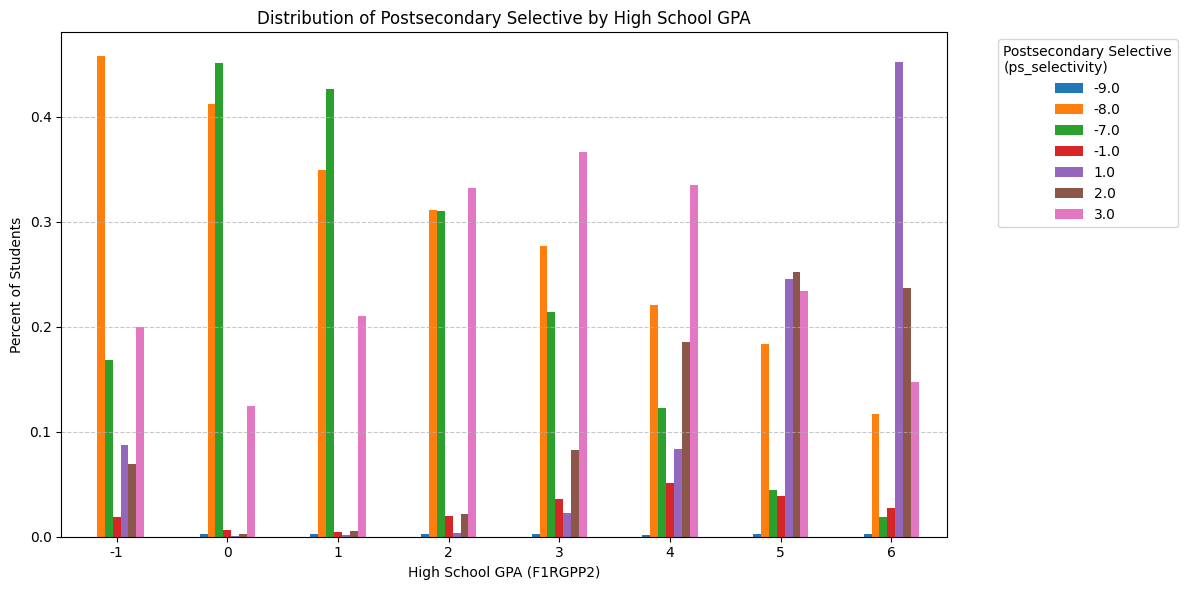

In [22]:
# Create a cross-tabulation of F1RGPP2 (High School GPA) and ps_selectivity (Postsecondary Selective)
crosstab = pd.crosstab(df_full['F1RGPP2'], df_full['ps_selectivity'], normalize='index')

# Create a grouped bar chart
ax = crosstab.plot(kind='bar', figsize=(12, 6))

# Customize the chart
plt.title('Distribution of Postsecondary Selective by High School GPA')
plt.xlabel('High School GPA (F1RGPP2)')
plt.ylabel('Percent of Students')
plt.legend(title='Postsecondary Selective\n(ps_selectivity)', bbox_to_anchor=(1.05, 1))

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

In [23]:
# Count records where ps_selectivity is 3 (highly selective) and F1RGPP2 is 6 (highest GPA)
count = len(df_full[(df_full['ps_selectivity'] == 3) & (df_full['F1RGPP2'] == 6)])
print(f"Number of students with highest GPA (F1RGPP2=6) who attended highly selective institutions: {count}")


Number of students with highest GPA (F1RGPP2=6) who attended highly selective institutions: 301


In [24]:
# Count records where ps_selectivity is 3 (highly selective) and F1RGPP2 is 6 (highest GPA)
count = len(df_full[df_full['F1RGPP2'] == 6])
print(f"Number of students with highest GPA (F1RGPP2=6): {count}")


Number of students with highest GPA (F1RGPP2=6): 2045


In [25]:
# Create undermatched field - 1 if student has highest GPA but did not attend highly selective institution
df_full['undermatched'] = ((df_full['F1RGPP2'] == 6) & 
                          ((df_full['ps_selectivity'] == -1) | 
                           (df_full['ps_selectivity'] == 3))).astype(int)

df_full['undermatched'].value_counts()

undermatched
0    23147
1      356
Name: count, dtype: int64

In [30]:
label_col_name = 'undermatched'

engineered_cols = ['F1RGPP2', 'ps_selectivity']


In [31]:
# Get list of columns where second character is 1,2,3 or field is STU_ID, excluding _IM fields
variables_list = [col for col in columns_50pct_valid 
                      if (len(col) > 1 and col[1] in ['1','2','3']) or col == 'STU_ID']
variables_list = [col for col in variables_list if not col.endswith('_IM')]

# Add the engineered columns to the variables_list
variables_list.extend(engineered_cols)

# Count and print number of fields
print(f"Number of fields meeting criteria: {len(variables_list)}")

# Display first few rows of df_full with selected columns
print("\nFirst few rows of df_full with selected columns:")
print(df_full[variables_list].head())


Number of fields meeting criteria: 5534

First few rows of df_full with selected columns:
   STU_ID  X2UNIV1  X2UNIV2A  X2UNIV2B  X3UNIV1   W1STUDENT    W1PARENT  \
0   10001       11         1         1     1111  375.667105  470.250141   
1   10002       11         1         1     1111  189.309446  224.455466   
2   10003       11         1         1     1111  143.591863  185.301339   
3   10004       10         1         7     1001  227.937019  301.431713   
4   10005       11         1         1     1111  145.019401  190.834136   

    W1MATHTCH    W1SCITCH   W2STUDENT  ...  W3W1SCITCH194  W3W1SCITCH195  \
0  423.238620  393.169508  365.607062  ...       0.000000    1004.686071   
1  329.640843  207.892322  196.338045  ...       0.000000       0.000000   
2  231.718703    0.000000  137.678887  ...       0.000000       0.000000   
3  261.518593  306.102816    0.000000  ...       0.000000       0.000000   
4  169.946035  188.432535  134.566242  ...     369.953871       0.000000   

  

In [32]:
# Create working dataset with only highest GPA students and selected variables
working_df = df_full[df_full['F1RGPP2'] == 6][variables_list + [label_col_name]]

# Display shape and first few rows
print(f"Shape of working dataset: {working_df.shape}")
print("\nFirst few rows:")
print(working_df.head())


Shape of working dataset: (2045, 5535)

First few rows:
    STU_ID  X2UNIV1  X2UNIV2A  X2UNIV2B  X3UNIV1   W1STUDENT    W1PARENT  \
1    10002       11         1         1     1111  189.309446  224.455466   
3    10004       10         1         7     1001  227.937019  301.431713   
9    10010       11         1         1     1111  161.738855  242.626125   
11   10012       11         1         1     1111   25.551778   32.865041   
14   10015       11         1         1     1111  121.737188  148.274433   

     W1MATHTCH    W1SCITCH   W2STUDENT  ...  W3W1SCITCH195  W3W1SCITCH196  \
1   329.640843  207.892322  196.338045  ...       0.000000       0.000000   
3   261.518593  306.102816    0.000000  ...       0.000000       0.000000   
9   354.278169  318.458929  162.112107  ...    1850.166757    1636.072857   
11   43.068248   34.990715   40.514546  ...     225.151826       0.000000   
14  136.853714  158.271519   83.389732  ...     212.953374     206.577364   

    W3W1SCITCH197  W3W1S

In [34]:
# Calculate correlation between family income and undermatching
# Using Cramer's V since both variables are categorical
from scipy.stats import chi2_contingency
import numpy as np

# Create contingency table
contingency = pd.crosstab(working_df['X2FAMINCOME'], working_df['undermatched'])

# Calculate chi-square test statistic and p-value
chi2, p_value, dof, expected = chi2_contingency(contingency)

# Calculate Cramer's V
n = contingency.sum().sum()
min_dim = min(contingency.shape) - 1
cramer_v = np.sqrt(chi2 / (n * min_dim))

print(f"Cramer's V correlation between family income and undermatching: {cramer_v:.4f}")
print(f"Chi-square p-value: {p_value:.4e}")


Cramer's V correlation between family income and undermatching: 0.1596
Chi-square p-value: 1.2972e-06


In [38]:
import scipy.stats as stats

# Calculate correlation between family income and undermatching, excluding -8 values
# Using point-biserial correlation since income is continuous and undermatching is binary

# Filter out -8 values from X2FAMINCOME
filtered_df = working_df[working_df['X2FAMINCOME'] != -8]

# Calculate point-biserial correlation
correlation = filtered_df['X2FAMINCOME'].corr(filtered_df['undermatched'])

# Calculate p-value using t-test
n = len(filtered_df)
t_stat = correlation * np.sqrt((n-2)/(1-correlation**2))
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), n-2))

print(f"Point-biserial correlation between family income and undermatching (excluding -8): {correlation:.4f}")
print(f"P-value: {p_value:.4e}")


Point-biserial correlation between family income and undermatching (excluding -8): -0.1415
P-value: 2.8321e-10


In [46]:
# Initialize empty lists for categorical and continuous columns
categorical_cols = []
continuous_cols = []

# Get unique value counts for each column
for column in working_df.columns:
    # Get number of unique values (nunique() already returns an integer)
    n_unique = working_df[column].nunique()
    
    # Classify columns based on number of unique values using explicit comparison
    if isinstance(n_unique, (int, float)) and n_unique < 10:
        categorical_cols.append(column)
    else:
        continuous_cols.append(column)

print("Categorical columns:")
print(len(categorical_cols))
print("\nContinuous columns:")
print(len(continuous_cols))


Categorical columns:
1482

Continuous columns:
4053


In [61]:
# Initialize empty lists to store highly correlated columns and error columns
high_corr_cols = []
error_cols = []

# Loop through all columns
for column in working_df.columns:
    if column != 'undermatched':  # Skip the undermatched column itself
        try:
            # Handle continuous columns using point-biserial correlation
            if column in continuous_cols:
                # Create temporary dataframe with only valid values
                temp_df = working_df[[column, 'undermatched']].copy()  # Create a copy
                temp_df.reset_index(drop=True, inplace=True)  # Reset index
                
                # Get valid indices using numpy.where
                valid_indices = np.where(temp_df[column].values >= 0)[0]
                
                if len(valid_indices) > 0:
                    x = temp_df.iloc[valid_indices][column].values.astype(float)
                    y = temp_df.iloc[valid_indices]['undermatched'].values.astype(float)
                    correlation = np.corrcoef(x, y)[0, 1]
                    if not np.isnan(correlation) and abs(correlation) >= 0.15:
                        high_corr_cols.append((column, correlation))
            
            # Handle categorical columns using Cramer's V
            elif column in categorical_cols:
                # Create temporary dataframe with only valid values
                temp_df = working_df[[column, 'undermatched']].copy()  # Create a copy
                temp_df.reset_index(drop=True, inplace=True)  # Reset index
                
                # Get valid indices using numpy.where
                valid_indices = np.where(temp_df[column].values >= 0)[0]
                
                if len(valid_indices) > 0:
                    x = temp_df.iloc[valid_indices][column]
                    y = temp_df.iloc[valid_indices]['undermatched']
                    contingency = pd.crosstab(x, y)
                    # Only calculate if we have more than one unique value in both variables
                    if min(contingency.shape) > 1:
                        chi2_results = stats.chi2_contingency(contingency)
                        chi2 = chi2_results[0]
                        n = len(valid_indices)
                        min_dim = min(contingency.shape) - 1
                        cramer_v = np.sqrt(chi2 / (n * min_dim))
                        if cramer_v >= 0.15:
                            high_corr_cols.append((column, cramer_v))
                            
        except Exception as e:
            error_cols.append((column, str(e)))
            continue

# Sort by absolute correlation value
high_corr_cols.sort(key=lambda x: abs(x[1]), reverse=True)

print("\nColumns with strong correlations (>=0.3 or <=-0.3):")
for col, corr in high_corr_cols:
    print(f"{col}: {corr:.4f}")

print("\nColumns that encountered errors:")
for col, error in error_cols:
    print(f"{col}: {error}")


Columns with strong correlations (>=0.3 or <=-0.3):
ps_selectivity: 1.0000
S3CLGSEL: 0.8176
S3CHOICEACCSEL: 0.6025
S3CHOICEAPPSEL: 0.5818
S3CLGLVL: 0.5132
S3PROGLEVEL: 0.4533
S3CHOICEACCLVL: 0.4278
S3CHOICEAPPLVL: 0.4175
S3WHERELIVE: 0.4171
X3PROGLEVEL: 0.2566
P1TYPEPS: 0.2563
P1HIDEG2: 0.2176
S2TYPEPS2013: 0.2169
S3REPUTATION: 0.2143
X1PAR2EDU: 0.2138
X3TCREDAPIB: -0.2137
X1MOMEDU: 0.2094
X2PAR2EDU: 0.2077
X3TCREDAPMTH: 0.2068
X1DADEDU: 0.2064
P1HIDEG1: 0.2059
X3TAGPAWGT: 0.2054
X1PAR1EDU: 0.2042
S2FR4Y: 0.2028
X1SESQ5: 0.2012
X1SESQ5_U: 0.1995
X1PAREDU: 0.1979
X2DADEDU: 0.1930
X3THIMATH: -0.1923
X3TCREDGEN: 0.1906
X2MOMEDU: 0.1878
X2X1TXMSCR: -0.1851
X3WORK: 0.1837
X3THILANG: -0.1835
X2SESQ5_U: 0.1832
X3CLGANDWORK: 0.1831
X2TXMTH1: -0.1831
S2FR2YPUB: 0.1831
S3WORK: 0.1830
X2PAREDU: 0.1826
X3T1CREDCALC: 0.1816
X3THISCI: 0.1804
X2TXMTSCOR: -0.1802
X2TXMTH: -0.1800
X2REQLEVEL: 0.1799
X2TXMTH4: -0.1790
X2TXMSCR: -0.1787
X2TXMTH2: -0.1780
X1TXMSCR: -0.1777
S3CLGAPPNUM: -0.1776
X2TXMTH5: 

In [70]:
# Extract column names from high_corr_cols tuples
correlated_columns = [col for col, _ in high_corr_cols]
print("\nList of correlated column names:")
print(correlated_columns)

# Filter layout_df to only show records where field_name is in correlated_columns
correlated_fields_layout = layout_df[layout_df['field_name'].isin(correlated_columns)]

print("\nRecord layout details for correlated columns:")
print(correlated_fields_layout.to_string())

# Save the correlated fields layout to CSV with fixed width formatting
output_path = '../data/raw_data/hsls_09/correlated_fields_layout.csv'

# Format each row with fixed widths before saving
formatted_rows = []
for _, row in correlated_fields_layout.iterrows():
    field_name = f"{row['field_name']:<15}"  # Left align, 15 chars
    location = f"{row['location']:<14}"      # Left align, 14 chars (starts at 16)
    description = row['description']         # Rest of line (starts at 30)
    formatted_rows.append(f"{field_name}{location}{description}")

# Write formatted rows to file
with open(output_path, 'w') as f:
    f.write('\n'.join(formatted_rows))

print(f"\nSaved correlated fields layout to: {output_path}")



List of correlated column names:
['ps_selectivity', 'S3CLGSEL', 'S3CHOICEACCSEL', 'S3CHOICEAPPSEL', 'S3CLGLVL', 'S3PROGLEVEL', 'S3CHOICEACCLVL', 'S3CHOICEAPPLVL', 'S3WHERELIVE', 'X3PROGLEVEL', 'P1TYPEPS', 'P1HIDEG2', 'S2TYPEPS2013', 'S3REPUTATION', 'X1PAR2EDU', 'X3TCREDAPIB', 'X1MOMEDU', 'X2PAR2EDU', 'X3TCREDAPMTH', 'X1DADEDU', 'P1HIDEG1', 'X3TAGPAWGT', 'X1PAR1EDU', 'S2FR4Y', 'X1SESQ5', 'X1SESQ5_U', 'X1PAREDU', 'X2DADEDU', 'X3THIMATH', 'X3TCREDGEN', 'X2MOMEDU', 'X2X1TXMSCR', 'X3WORK', 'X3THILANG', 'X2SESQ5_U', 'X3CLGANDWORK', 'X2TXMTH1', 'S2FR2YPUB', 'S3WORK', 'X2PAREDU', 'X3T1CREDCALC', 'X3THISCI', 'X2TXMTSCOR', 'X2TXMTH', 'X2REQLEVEL', 'X2TXMTH4', 'X2TXMSCR', 'X2TXMTH2', 'X1TXMSCR', 'S3CLGAPPNUM', 'X2TXMTH5', 'X2SESQ5', 'S3SOCIALLIFE', 'S2ANYAP', 'X1TXMTSCOR', 'S2PSATNUM', 'S3FOCUS', 'X3TCREDAPSS', 'X2PAR1EDU', 'X1TXMPROF4', 'X2TXMTH3', 'A2HIGHERED', 'X3TCREDAPENG', 'X3THIPHY', 'X3TCREDAPSCI', 'X2TXMPROF5', 'P1INCOMECAT', 'A1UNPREP', 'X2TXMPROF6', 'X1PAR2OCC2', 'X1FAMINCOME', 'S3CHO

In [72]:
# Create list of columns to exclude
exclude_cols = [
    'ps_selectivity',
    'S3CLGSEL',
    'S3CHOICEACCSEL',
    'S3CHOICEAPPSEL',
    'S3CLGLVL',
    'S3PROGLEVEL',
    'S3CHOICEACCLVL',
    'S3CHOICEAPPLVL',
    'S3WHERELIVE',
    'X3PROGLEVEL'
]

# Filter correlated_columns to exclude the specified columns
filtered_cols = [col for col in correlated_columns if col not in exclude_cols]

print("Filtered correlated columns:")
print(filtered_cols)

# Write filtered columns to a text file
output_path = '../data/raw_data/hsls_09/filtered_correlated_columns.txt'

with open(output_path, 'w') as f:
    # Write each column name on a new line
    f.write('\n'.join(filtered_cols))

print(f"Saved filtered correlated columns to: {output_path}")


Filtered correlated columns:
['P1TYPEPS', 'P1HIDEG2', 'S2TYPEPS2013', 'S3REPUTATION', 'X1PAR2EDU', 'X3TCREDAPIB', 'X1MOMEDU', 'X2PAR2EDU', 'X3TCREDAPMTH', 'X1DADEDU', 'P1HIDEG1', 'X3TAGPAWGT', 'X1PAR1EDU', 'S2FR4Y', 'X1SESQ5', 'X1SESQ5_U', 'X1PAREDU', 'X2DADEDU', 'X3THIMATH', 'X3TCREDGEN', 'X2MOMEDU', 'X2X1TXMSCR', 'X3WORK', 'X3THILANG', 'X2SESQ5_U', 'X3CLGANDWORK', 'X2TXMTH1', 'S2FR2YPUB', 'S3WORK', 'X2PAREDU', 'X3T1CREDCALC', 'X3THISCI', 'X2TXMTSCOR', 'X2TXMTH', 'X2REQLEVEL', 'X2TXMTH4', 'X2TXMSCR', 'X2TXMTH2', 'X1TXMSCR', 'S3CLGAPPNUM', 'X2TXMTH5', 'X2SESQ5', 'S3SOCIALLIFE', 'S2ANYAP', 'X1TXMTSCOR', 'S2PSATNUM', 'S3FOCUS', 'X3TCREDAPSS', 'X2PAR1EDU', 'X1TXMPROF4', 'X2TXMTH3', 'A2HIGHERED', 'X3TCREDAPENG', 'X3THIPHY', 'X3TCREDAPSCI', 'X2TXMPROF5', 'P1INCOMECAT', 'A1UNPREP', 'X2TXMPROF6', 'X1PAR2OCC2', 'X1FAMINCOME', 'S3CHOICEAPPCNTRL', 'A2PRNTINV', 'X3TCREDADV', 'S3CLGCNTRL', 'N1INVOLVEMNT', 'X3TGPAWGT', 'X3T1CREDPHYS', 'X2TXMPROF4', 'X3TCREDLANG', 'C2PCTAP', 'S2FRCLGEXAM', 'S2CANTAF